In [1]:
import tensorflow as tf

In [2]:
device = "/device:CPU:0"

In [3]:
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, SpatialDropout2D
from tensorflow.keras.losses import sparse_categorical_crossentropy, binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train = 'TrashType/Train'
test = 'TrashType/Test'
val = 'TrashType/Validation'  # Assuming you have a validation folder

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(
    train,
    target_size=(300, 300),
    batch_size=32,
    class_mode='sparse'
)

Found 2074 images belonging to 6 classes.


In [7]:
validation_generator = val_datagen.flow_from_directory(
    val,
    target_size=(300, 300),
    batch_size=32,
    class_mode='sparse'
)

Found 201 images belonging to 6 classes.


In [8]:
test_generator = test_datagen.flow_from_directory(
    test,
    target_size=(300, 300),
    batch_size=32,
    class_mode='sparse'
)

Found 252 images belonging to 6 classes.


In [9]:
labels = (train_generator.class_indices)
print(labels,'\n')

labels = dict((v,k) for k,v in labels.items())
print(labels)

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5} 

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [10]:
for image_batch, label_batch in train_generator:
    break
image_batch.shape, label_batch.shape

((32, 300, 300, 3), (32,))

In [11]:
test_labels = (test_generator.class_indices)
print(test_labels,'\n')

test_labels = dict((v,k) for k,v in test_labels.items())
print(test_labels)

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5} 

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [12]:
print(train_generator.class_indices)
Labels = '\n'.join(sorted(train_generator.class_indices.keys()))

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}


In [13]:
with open('Labels.txt', 'w') as file:
    file.write(Labels)

In [14]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.regularizers import l1, l2  # import l1, l2 สำหรับ regularization

model = Sequential()

# Define the input shape using Input() for the first layer
model.add(Input(shape=(300, 300, 3)))

# Convolution blocks with L2 regularization
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

# Classification layers with L2 regularization
model.add(Flatten())

model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))

model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax', kernel_regularizer=l2(0.001)))

In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 300, 300, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 150, 150, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 150, 150, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 150, 150, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 75, 75, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 37, 37, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 37, 37, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 43808)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,803,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,843,910 (10.85 MB)

 Trainable params: 2,843,910 (10.85 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


64/64 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.2013 - loss: 2.4284 - val_accuracy: 0.2083 - val_loss: 1.9504
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3125 - loss: 1.9393 - val_accuracy: 0.1111 - val_loss: 1.9732
Epoch 3/50


C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


64/64 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.2383 - loss: 1.9054 - val_accuracy: 0.2656 - val_loss: 1.8650
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1562 - loss: 1.8585 - val_accuracy: 0.1111 - val_loss: 2.0678
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.2968 - loss: 1.8068 - val_accuracy: 0.3177 - val_loss: 1.8098
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4062 - loss: 1.6223 - val_accuracy: 0.1111 - val_loss: 1.8535
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.3276 - loss: 1.7313 - val_accuracy: 0.3281 - val_loss: 1.7542
Epoch 8/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3125 - loss: 1.7390 - val_accuracy: 0.2222 - val_loss: 1.7641
Epoch 9/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.3605 - loss: 1.6371 - val_accuracy: 0.4271 - val_loss: 1.5792
Epoch 10/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4375 - loss: 1.4714 - val_accuracy: 0.0000e+00 - val_loss: 1.782

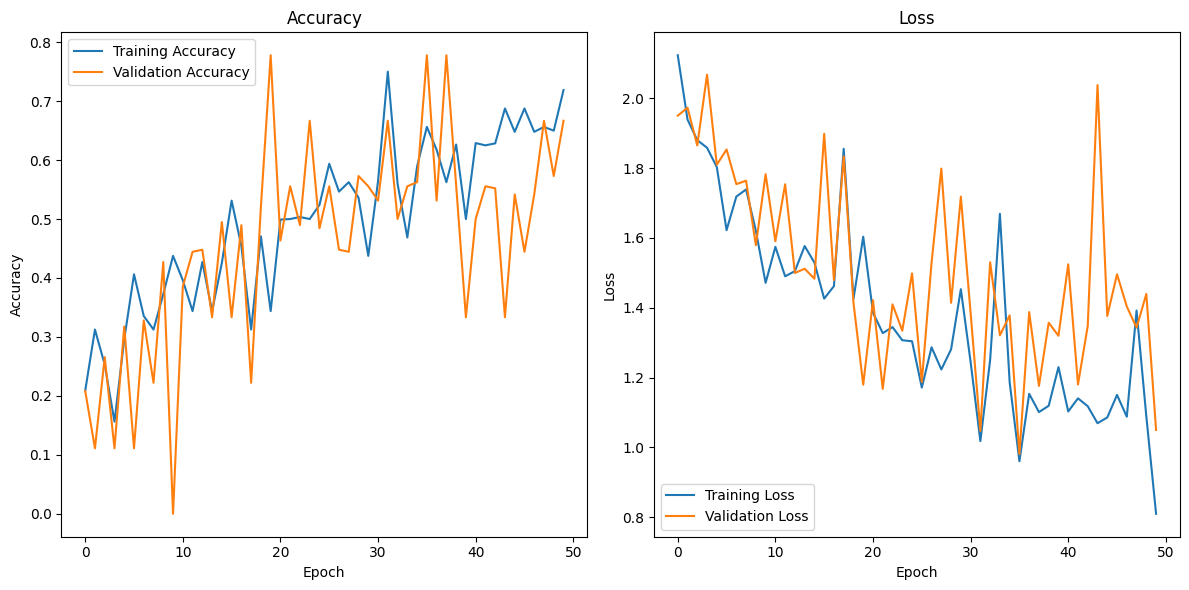

In [16]:
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# เรียกใช้ model.fit() และเก็บ history object
history = model.fit(
    train_generator,
    epochs=50,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32
)

# สร้างกราฟสำหรับ training และ validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# สร้างกราฟสำหรับ training และ validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
Probability: 0.99965334
Classified: cardboard 



Text(0.5, 1.0, 'Loaded Image')

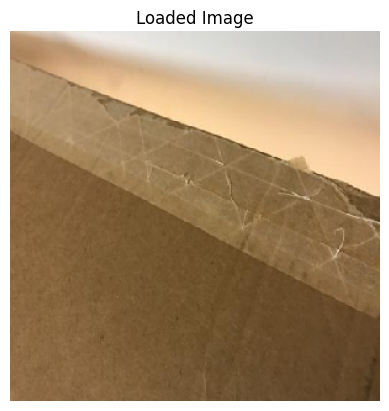

In [20]:
import keras.utils as ku
import numpy as np

test_img = 'TrashType/test/cardboard/cardboard_364.jpg'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")
